In [1]:
your_path = "/content/"
try:
    from google.colab import drive
    drive.mount('/content/drive')
    import os
    os.chdir(your_path)
    print(os.getcwd())
except ModuleNotFoundError:
    print("you are not in google colab, pass this phase")
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

you are not in google colab, pass this phase


# Convolutional Neural Network

## Manual Kernel

수직과 수평커널을 만들어서 어떤 효과가 있는지 살펴본다.

In [2]:
k = torch.FloatTensor([[1, 0, -1], 
                       [1, 0, -1], 
                       [1, 0, -1]])
k.size()

torch.Size([3, 3])

In [3]:
k= torch.FloatTensor([[1, 0, -1], 
                      [1, 0, -1], 
                      [1, 0, -1]]).unsqueeze(0)
print(k.size())
print(k)

torch.Size([1, 3, 3])
tensor([[[ 1.,  0., -1.],
         [ 1.,  0., -1.],
         [ 1.,  0., -1.]]])


In [4]:
k= torch.FloatTensor([[1, 0, -1], 
                    [1, 0, -1], 
                    [1, 0, -1]]).unsqueeze(0).unsqueeze(0)
print(k.size())
print(k)

torch.Size([1, 1, 3, 3])
tensor([[[[ 1.,  0., -1.],
          [ 1.,  0., -1.],
          [ 1.,  0., -1.]]]])


In [5]:
k= torch.FloatTensor([[1, 0, -1], 
                    [1, 0, -1], 
                    [1, 0, -1]]).unsqueeze(0).repeat(3, 1, 1).unsqueeze(0)
print(k.size())
print(k)

torch.Size([1, 3, 3, 3])
tensor([[[[ 1.,  0., -1.],
          [ 1.,  0., -1.],
          [ 1.,  0., -1.]],

         [[ 1.,  0., -1.],
          [ 1.,  0., -1.],
          [ 1.,  0., -1.]],

         [[ 1.,  0., -1.],
          [ 1.,  0., -1.],
          [ 1.,  0., -1.]]]])


In [6]:
def plot_maps(outputs, titles):
    fig, axes = plt.subplots(1, len(outputs), figsize=(12, 8), dpi=100)
    for (ax, o, t) in zip(axes, outputs, titles):
        ax.imshow(o.squeeze(), cmap="bone")
        ax.axis("off")
        ax.set_title(t, fontsize=12)


In [7]:
img = Image.open("./budapest.jpg")

In [8]:
np.array(img).shape # array shape

(853, 1280, 3)

tensor([[[[  0.,   0.,   0.,  ...,  62.,  66.,  59.],
          [  0.,   0.,   0.,  ...,  70.,  54.,  65.],
          [  0.,   0.,   0.,  ...,  69.,  53.,  79.],
          ...,
          [  1.,   1.,   1.,  ...,  72.,  76.,  81.],
          [  1.,   1.,   1.,  ...,  73.,  75.,  80.],
          [  1.,   1.,   1.,  ...,  73.,  75.,  79.]],

         [[ 14.,  14.,  14.,  ...,  47.,  54.,  49.],
          [ 14.,  14.,  14.,  ...,  54.,  42.,  55.],
          [ 14.,  14.,  14.,  ...,  53.,  38.,  67.],
          ...,
          [ 82.,  82.,  82.,  ...,  49.,  54.,  59.],
          [ 82.,  82.,  82.,  ...,  50.,  53.,  58.],
          [ 82.,  82.,  82.,  ...,  50.,  53.,  57.]],

         [[ 49.,  49.,  49.,  ...,  24.,  30.,  24.],
          [ 49.,  49.,  49.,  ...,  31.,  18.,  30.],
          [ 49.,  49.,  49.,  ...,  30.,  15.,  43.],
          ...,
          [148., 148., 148.,  ...,  31.,  33.,  38.],
          [148., 148., 148.,  ...,  32.,  32.,  37.],
          [148., 148., 148.,  ...

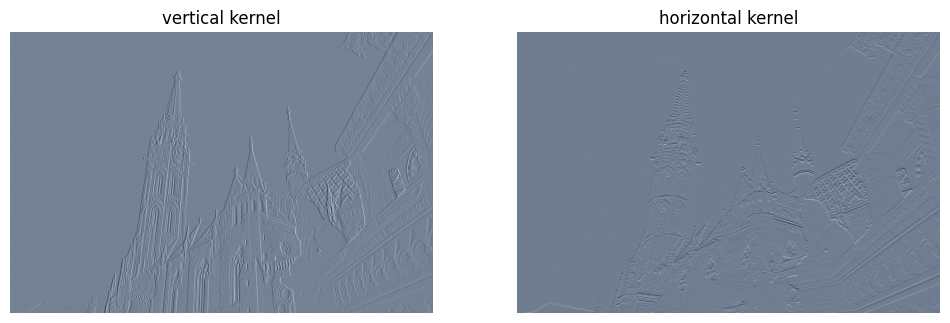

In [9]:

# (B, C_in, H_in, W_out) \ (1, 3, 853, 1280)
img_tensor = torch.FloatTensor(np.array(img)).permute(2, 0, 1).unsqueeze(0)
# img_tensor = torch.FloatTensor(np.array(img)).transpose(2, 0, 1).unsqueeze(0)
print(img_tensor)
# vertical_kernel: (C_out, C_in, K_H, K_W) = (1, 3, 3, 3)
v_kernel = torch.FloatTensor([[1, 0, -1], 
                              [1, 0, -1], 
                              [1, 0, -1]]).unsqueeze(0).repeat(3, 1, 1).unsqueeze(0)

# horizontal_kernel: (C_out, C_in, K_H, K_W)  = (1, 3, 3, 3)
h_kernel = torch.FloatTensor([[ 1,  1,  1], 
                              [ 0,  0,  0], 
                              [-1, -1, -1]]).unsqueeze(0).repeat(3, 1, 1).unsqueeze(0)

v_output = torch.nn.functional.conv2d(img_tensor, weight=v_kernel, bias=None)
h_output = torch.nn.functional.conv2d(img_tensor, weight=h_kernel, bias=None)

outputs = [v_output, h_output]
titles = ["vertical kernel", "horizontal kernel"]
# Plotting Maps
plot_maps(outputs, titles)

## Layers

### Convolution Layer

[`nn.Conv2d`](https://pytorch.org/docs/stable/nn.html#conv2d) 합성곱 연산층은 다음과 같은 arguments를 받는다.

* `in_channels`: 입력 채널 갯수
* `out_channels`: 출력 채널 갯수
* `kernel_size`: 커널(필터) 크기, integer 를 넣으면 자동으로 높이와 너비가 같은 크기의 커널이 된다. tuple에 따로 크기를 지정해서 줄 수도 있다.
* `stride`: 슬라이딩 되는 칸 수를 조정한다.
* `padding`: 패딩의 수

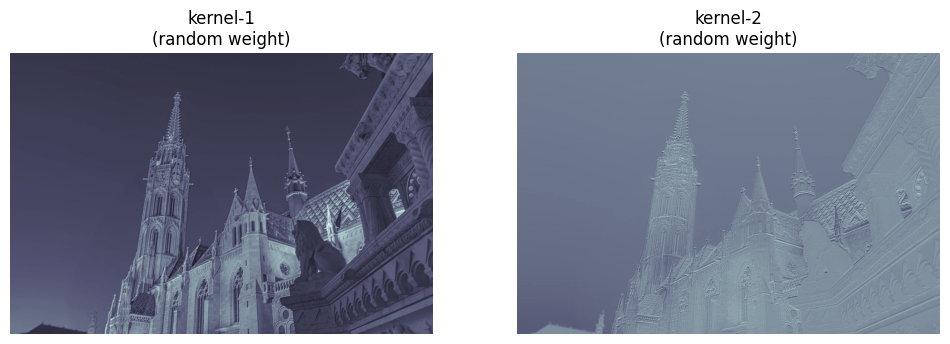

In [10]:
seed = 777
torch.manual_seed(seed)
conv_layer = nn.Conv2d(in_channels=3, 
                       out_channels=2, 
                       kernel_size=(3, 3), 
                       stride=1,
                       padding=0)
outputs = conv_layer(img_tensor).detach()
titles = ["kernel-1\n(random weight)", "kernel-2\n(random weight)"]
# Plotting Maps
plot_maps(outputs.squeeze(), titles)

### Activation Maps

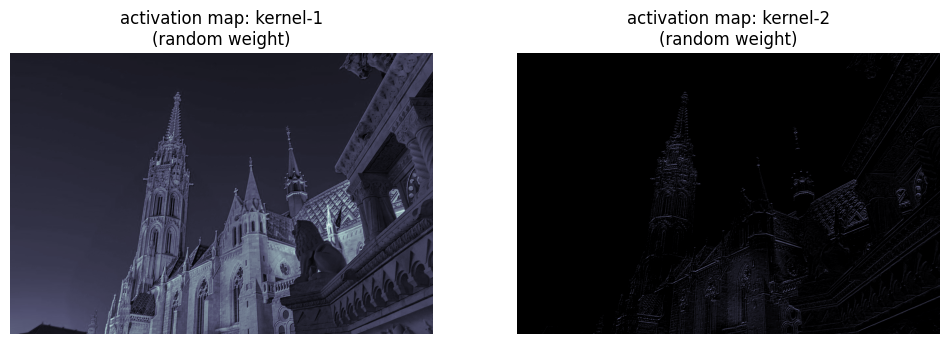

In [11]:
activation_maps = torch.relu(outputs)
titles = ["activation map: kernel-1\n(random weight)", 
          "activation map: kernel-2\n(random weight)"]
# Plotting Maps
plot_maps(activation_maps.squeeze(), titles)

### Maxpooling Layer

[`nn.MaxPool2d`](https://pytorch.org/docs/stable/nn.html#maxpool2d) 최대 풀링층에 필요한 arguments는 다음과 같다.

* `kernel_size`: 커널(필터) 크기
* `stride`: None 값이며, 보통 커널 크기와 같게 설정된다. 
* `return_indices`: Max Pooling 한 위치를 반환한다.

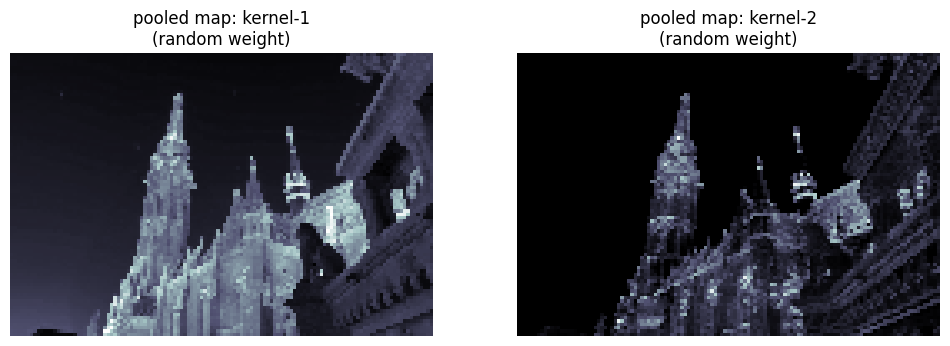

In [12]:
maxpool_layer = nn.MaxPool2d(kernel_size=10)
pooled_maps = maxpool_layer(activation_maps)
titles = ["pooled map: kernel-1\n(random weight)", 
          "pooled map: kernel-2\n(random weight)"]
# Plotting Maps
plot_maps(pooled_maps.squeeze(), titles)

# CIFAR10 데이터 학습 시키기

Cifar 10은 각 이미지에 대해 10개의 클래스를 분류하는 데이터셋이며, 각 이미지는 (32x32) 크기를 가진 RGB 이미지다.

## 데이터 불러오기 및 전처리 파이프라인

파이프라인은 한 데이터 처리 단계의 출력이 다음 단계의 입력으로 이어지는 형태로 연결된 구조를 가리킨다. 이미지 전처리 파이프라인은 `torchvision` 패키지의 `transforms`를 주로 사용한다.

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [14]:
cifar10_mean = (0.4914, 0.4822, 0.4465)
cifar10_std = (0.2470, 0.2435, 0.2616)

img_transformer = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # 랜덤으로(0.5의 확률) 수평 대칭 뒤집기
    transforms.ToTensor(),  # Tensor로 변환 (32, 32, 3) > (3, 32, 32)
    transforms.Normalize(mean=cifar10_mean, std=cifar10_std)  # 평균과 분산으로 normalizing
])

topil = transforms.ToPILImage()
img_transformed = img_transformer(img)

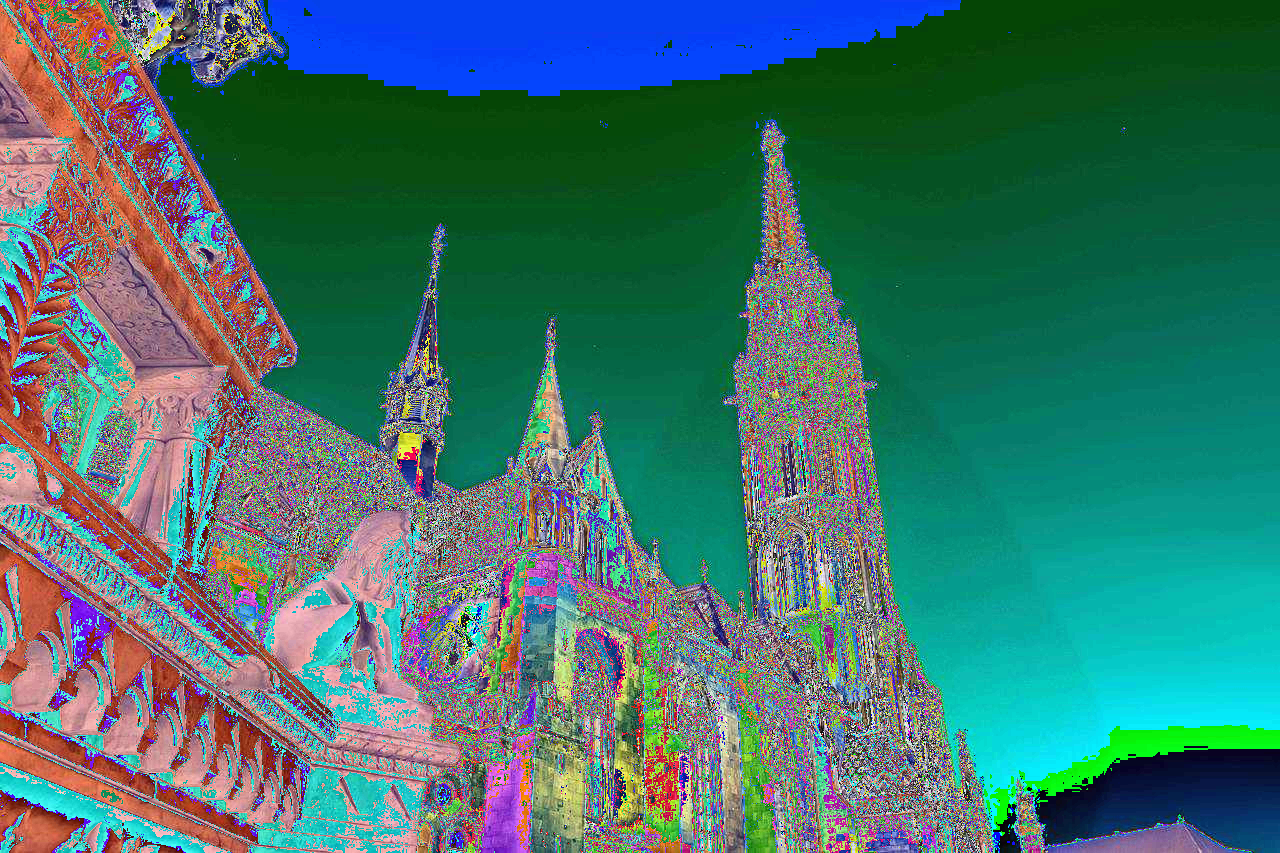

In [15]:
topil(img_transformed)

In [16]:
# 데이터 경로
data_path = "./cifar/"

train_dataset = datasets.CIFAR10(
    root=data_path,
    train=True, 
    transform=img_transformer,
    download=True)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=64, 
    shuffle=True)

test_dataset = datasets.CIFAR10(
    root=data_path,
    train=False, 
    transform=img_transformer,
    download=True)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=64, 
    shuffle=True)

100%|██████████| 170498071/170498071 [00:11<00:00, 14656293.67it/s]


Extracting ./cifar/cifar-10-python.tar.gz to ./cifar/
Files already downloaded and verified


In [17]:
for batch_idx, (data, target) in enumerate(train_loader):
    # 입력과 타겟 텐서에 GPU 를 사용여부 전달
#     data, target = data.to(device), target.to(device)
    break

In [18]:
data.size()

torch.Size([64, 3, 32, 32])

## CNN 모델 (Coding Part)

### 네트워크 설계

* Input Size = (B, 3, 32, 32)
* Output Size = (B, 10)
* Activation Function(`nn.ReLU`): ReLU
* Loss Function(`nn.CrossEntropyLoss`): Cross Entropy Loss
* Optimizer(`optim.Adam`): Adam
* Convolutional Layer: `self.convs` 변수의 `nn.Sequential`안에 구현
    > Conv1
    >
    > 1. Conv(`nn.Conv2d`): 입력채널 3, 출력채널 8, 커널크기 3, 스트라이드 1, 패딩 1
    > 2. ReLU(`nn.ReLU`)
    > 3. MaxPool(`nn.MaxPool2d`): 커널크기 2
    >
     
    > Conv2
    >
    > 4. Conv(`nn.Conv2d`): 입력채널 8, 출력채널 16, 커널크기 3, 스트라이드 1, 패딩 0 
    > 5. ReLU(`nn.ReLU`)
    > 6. MaxPool(`nn.MaxPool2d`): 커널크기 2
    >

    > Conv3
    >
    > 7. Conv(`nn.Conv2d`): 입력채널 16, 출력채널 32, 커널크기 2, 스트라이드 1, 패딩 0
    > 8. ReLU(`nn.ReLU`)  
    > 9. MaxPool(`nn.MaxPool2d`): 커널크기 2
    >

* Fully Connected Layer: `self.fc` 변수의 `nn.Sequential`안에 구현
    > 1. Linear(`nn.Linear`): Hidden Size = 100 (**입력 뉴런수 계산 필요**)
    > 2. ReLU(`nn.ReLU`)
    > 3. Linear(`nn.Linear`): Hidden Size = 100
    > 4. ReLU(`nn.ReLU`)
    > 5. Linear(`nn.Linear`): Hidden Size = 10

In [24]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        # 층을 구성
        self.convs = nn.Sequential(
            # Conv1
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1),
            #(B, 3, 32, 32) > (B, 8, 32, 32)
            nn.ReLU(),
            # (B, 8, 32, 32)
            nn.MaxPool2d(kernel_size=2, stride=2),
            # (B, 8, 16, 16)
        
            # Conv2
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=0),
            # (B, 8, 16, 16) > (B, 16, 14, 14)
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2, stride=2),
            # (B, 16, 14, 14) > (B, 16, 7, 7)
        
            # Conv3
            
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=2, stride=1, padding=0),
            # (7+0-2)/1 + 1
            # (B, 16, 7, 7) > (B, 32, 6, 6)
            
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2, stride=2),
            # (B, 32, 3, 3)
        )
        # print(nn.size())
        self.fc = nn.Sequential(
            nn.Linear(in_features=32*3*3, out_features=100),  # tensor size ?
            nn.ReLU(), #(B, 100)
            nn.Linear(100, 100), #(B, 100) > (B, 100) weight(100, 100)
            nn.ReLU(),  
            nn.Linear(100, 10), 
        )
        
    def forward(self, x):
        # forward propagation 수행
        # Conv Layers
        x = self.convs(x)
        # x의 차원을 (미니배치, 32*3*3)에 알맞게 수정한다.
        
        x = x.view(-1,32*3*3)
        # FC Layers
        x = self.fc(x)
        return x

### 손실함수 및 옵티마이저

In [25]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
# 커스텀 모듈 호출
model = Network().to(device)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

cuda


## 모델훈련

### Train 함수(Coding Part)

In [26]:
def train(model, train_loader, loss_function, optimizer, n_train, print_step, device):
    # Training
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # 입력과 타겟 텐서에 GPU 를 사용여부 전달
        data, target = data.to(device), target.to(device)
        # 경사 초기화
        model.zero_grad()
        # 순방향 전파. 데어터를 넣어 예측값 입력
        output = model(data)
        # 손실값 계산
        loss = loss_function(output, target)
        # 역방향 전파
        loss.backward()
        # 매개변수 업데이트
        optimizer.step()
        # 중간 과정 print
        if batch_idx % print_step == 0:
            percentage = (batch_idx*train_loader.batch_size / n_train) * 100
            print(f" - [{percentage:.2f}%] train loss: {loss:.4f}")

### Validation 함수

In [27]:
def validation(model, test_loader, loss_function, n_test, device):
    # Validation
    model.eval()
    test_loss = 0
    correct = 0
    # torch.no_grad 를 사용하면 requires_grad 를 꺼두게 된다.
    with torch.no_grad():
        for data, target in test_loader:
            # 입력과 타겟 텐서에 GPU 를 사용여부 전달
            data, target = data.to(device), target.to(device)
            # 순방향전파
            output = model(data)
            # 손실값 계산
            test_loss += loss_function(output, target).item()
            # 예측 값에 해당하는 클래스 번호 반환
            pred = output.softmax(1).argmax(dim=1, keepdim=True)
            # 정확하게 예측한 개수를 기록한다
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_accuracy = correct / n_test
    
    return test_loss, test_accuracy

### 훈련시작

In [28]:
n_train = len(train_dataset)
n_test = len(test_dataset)
n_step = 20
print_step = 300
best_accuracy = 0

for step in range(n_step):
    print(f"[Step] {step+1}/{n_step}\n [Training Step]")
    train(model, train_loader, loss_function, optimizer, n_train, print_step, device)
    test_loss, test_accuracy = validation(model, test_loader, loss_function, n_test, device)
    print(f" [Validation Step]")
    print(f" - test loss: {test_loss:.4f} test accuracy: {test_accuracy*100:.2f} %")
    # 제일 성능을 보인 좋은 모델 저장하기
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        torch.save(model.state_dict(), "best_model-cifar10.pt")

[Step] 1/20
 [Training Step]
 - [0.00%] train loss: 2.3107
 - [38.40%] train loss: 1.6995
 - [76.80%] train loss: 1.4828
 [Validation Step]
 - test loss: 227.4412 test accuracy: 46.61 %
[Step] 2/20
 [Training Step]
 - [0.00%] train loss: 1.3141
 - [38.40%] train loss: 1.2102
 - [76.80%] train loss: 1.1778
 [Validation Step]
 - test loss: 198.1237 test accuracy: 55.00 %
[Step] 3/20
 [Training Step]
 - [0.00%] train loss: 1.2785
 - [38.40%] train loss: 1.3792
 - [76.80%] train loss: 1.0993
 [Validation Step]
 - test loss: 182.0056 test accuracy: 58.46 %
[Step] 4/20
 [Training Step]
 - [0.00%] train loss: 1.0685
 - [38.40%] train loss: 0.9240
 - [76.80%] train loss: 0.9415
 [Validation Step]
 - test loss: 176.1743 test accuracy: 59.78 %
[Step] 5/20
 [Training Step]
 - [0.00%] train loss: 1.0297
 - [38.40%] train loss: 1.0194
 - [76.80%] train loss: 1.2281
 [Validation Step]
 - test loss: 171.1504 test accuracy: 61.18 %
[Step] 6/20
 [Training Step]
 - [0.00%] train loss: 1.1331
 - [38.40%]

## 성능 향상시키기

Batch Normalization 을 넣어서 성능을 향상시켜보자. CNN에서 Batch Normalization 은 채널을 기준으로 Normalization 하게 된다.

In [29]:
class NetworkBN(nn.Module):
    def __init__(self):
        super(NetworkBN, self).__init__()
        # 층을 구성
        self.convs = nn.Sequential(
            # Conv1
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(8),
            #(B, 3, 32, 32) > (B, 8, 32, 32)
            nn.ReLU(),
            # (B, 8, 32, 32)
            nn.MaxPool2d(kernel_size=2, stride=2),
            # (B, 8, 16, 16)

            # Conv2
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(16),
            # (B, 8, 16, 16) > (B, 16, 14, 14)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # (B, 16, 14, 14) > (B, 16, 7, 7)

            # Conv3
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=2, stride=1, padding=0),
            nn.BatchNorm2d(32),
            # (7+0-2)/1 + 1
            # (B, 16, 7, 7) > (B, 32, 6, 6)
            
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2, stride=2)
            # (B, 32, 3, 3)
        )
        # print(nn.size())
        self.fc = nn.Sequential(
            nn.Linear(in_features=32*3*3, out_features=100),  # tensor size ?
            nn.ReLU(), #(B, 100)
            nn.Linear(100, 100), #(B, 100) > (B, 100) weight(100, 100)
            nn.ReLU(),  
            nn.Linear(100, 10), 
        )

      
        
    def forward(self, x):
        # forward propagation 수행
        # Conv Layers
        x = self.convs(x)
        # x의 차원을 (미니배치, 32*32)에 알맞게 수정한다.
        x = x.view(-1, 32*3*3)
        # FC Layers
        x = self.fc(x)
        return x

In [30]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
# 커스텀 모듈 호출
model = NetworkBN().to(device)

# loss_function = 
# optimizer = 
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


n_train = len(train_dataset)
n_test = len(test_dataset)
n_step = 20
print_step = 300
best_accuracy = 0

for step in range(n_step):
    print(f"[Step] {step+1}/{n_step}\n [Training Step]")
    # train(model, train_loader, loss_function, n_train, print_step, device)
    train(model, train_loader, loss_function, optimizer, n_train, print_step, device)
    test_loss, test_accuracy = validation(model, test_loader, loss_function, n_test, device)
    print(f" [Validation Step]")
    print(f" - test loss: {test_loss:.4f} test accuracy: {test_accuracy*100:.2f} %")
    # 제일 성능을 보인 좋은 모델 저장하기
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        torch.save(model.state_dict(), "best_model-cifar10-bn.pt")

cuda
[Step] 1/20
 [Training Step]
 - [0.00%] train loss: 2.2949
 - [38.40%] train loss: 1.6250
 - [76.80%] train loss: 1.3592
 [Validation Step]
 - test loss: 202.3074 test accuracy: 52.77 %
[Step] 2/20
 [Training Step]
 - [0.00%] train loss: 1.0672
 - [38.40%] train loss: 1.1340
 - [76.80%] train loss: 1.0921
 [Validation Step]
 - test loss: 165.3964 test accuracy: 62.01 %
[Step] 3/20
 [Training Step]
 - [0.00%] train loss: 0.8359
 - [38.40%] train loss: 1.0380
 - [76.80%] train loss: 0.7014
 [Validation Step]
 - test loss: 156.1180 test accuracy: 64.76 %
[Step] 4/20
 [Training Step]
 - [0.00%] train loss: 0.9011
 - [38.40%] train loss: 0.8608
 - [76.80%] train loss: 0.9608
 [Validation Step]
 - test loss: 147.0194 test accuracy: 66.62 %
[Step] 5/20
 [Training Step]
 - [0.00%] train loss: 1.0833
 - [38.40%] train loss: 1.0016
 - [76.80%] train loss: 1.0114
 [Validation Step]
 - test loss: 139.9870 test accuracy: 68.83 %
[Step] 6/20
 [Training Step]
 - [0.00%] train loss: 0.9741
 - [38